In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

## Part One

In [2]:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target

In [3]:
pca_85 = PCA(n_components=0.85, svd_solver='auto')
X_pca_85 = pca_85.fit_transform(X)
print("Number of components for n_components=0.85:", pca_85.n_components_)

Number of components for n_components=0.85: 59


In [4]:
pca_90 = PCA(n_components=0.90, svd_solver='auto')
X_pca_90 = pca_90.fit_transform(X)
print("Number of components for n_components=0.90:", pca_90.n_components_)

Number of components for n_components=0.90: 87


In [14]:
def plot_digits(X, y, num_images=10, title=None):
    fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(10, 20))
    for i in range(num_images):
        axes[i][0].imshow(X[i].reshape(28, 28), cmap=plt.cm.gray)
        axes[i][0].set_title("Original")
        axes[i][1].imshow(X[i].dot(pca_85.components_).reshape(28,28), cmap=plt.cm.gray)
        axes[i][1].set_title("PCA Reduced")
    if title:
        plt.suptitle(title)
    plt.show()

In [15]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


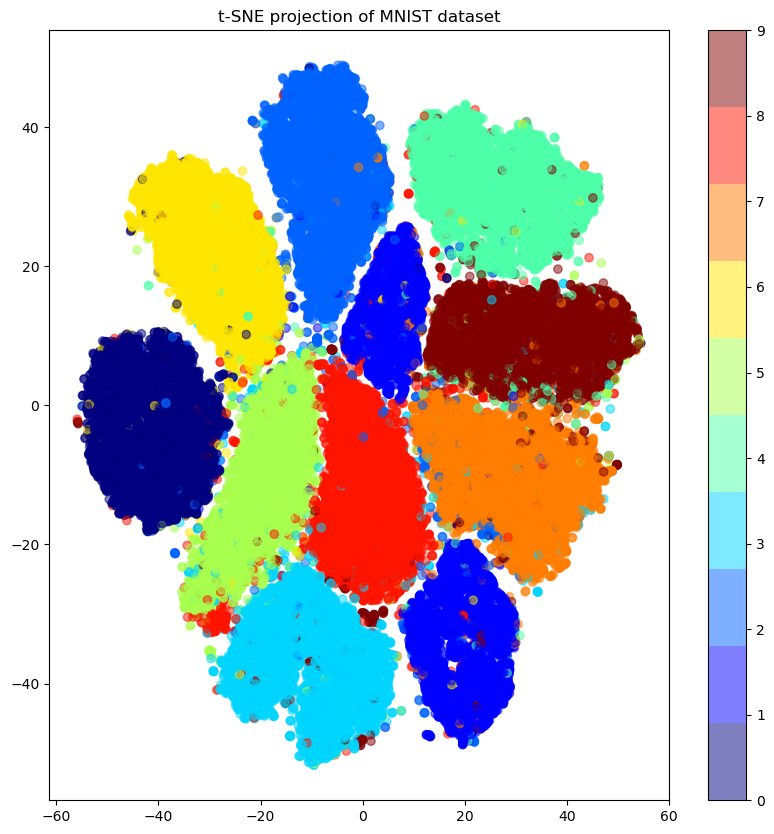

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.cat.codes, cmap=plt.cm.get_cmap('jet', 10), alpha=0.5)
plt.colorbar(ticks=range(10))
plt.title('t-SNE projection of MNIST dataset')
plt.show()

In [18]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Part 2

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pca = PCA(svd_solver='auto')
start_time = time.time()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
elapsed_time = time.time() - start_time

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for all features training:\n", cm)
print("Elapsed time for all features training: {:.2f} seconds".format(elapsed_time))

Confusion matrix for all features training:
 [[1336    0    3    0    0    0    2    1    1    0]
 [   0 1592    2    0    1    1    0    3    0    1]
 [   7   17 1323    1    4    1    5   17    3    2]
 [   0    2   12 1384    1    8    2    7    7   10]
 [   3    8    1    0 1251    0    2    3    1   26]
 [   2    5    0   16    2 1232   13    0    1    2]
 [   5    1    0    0    5    6 1379    0    0    0]
 [   1   21    4    0    4    0    0 1458    1   14]
 [   4   13    6   22    2   19    4   10 1267   10]
 [   6    5    2   11   19    0    0   17    1 1359]]
Elapsed time for all features training: 24.37 seconds


In [22]:
pca_85 = PCA(n_components=0.85, svd_solver='auto')
X_train_pca_85 = pca_85.fit_transform(X_train)
X_test_pca_85 = pca_85.transform(X_test)
knn.fit(X_train_pca_85, y_train)
y_pred_85 = knn.predict(X_test_pca_85)
elapsed_time_85 = time.time() - start_time - elapsed_time

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
cm_85 = confusion_matrix(y_test, y_pred_85)
print("\nConfusion matrix for reduced features training (n_components=0.85):\n", cm_85)
print("Elapsed time for reduced features training (n_components=0.85): {:.2f} seconds".format(elapsed_time_85))


Confusion matrix for reduced features training (n_components=0.85):
 [[1335    0    4    0    0    1    1    1    1    0]
 [   0 1588    5    0    1    0    0    3    1    2]
 [   6   10 1338    3    1    1    4   15    1    1]
 [   0    3   12 1387    1    8    1    6    7    8]
 [   3    4    1    0 1254    0    2    2    0   29]
 [   1    4    0   13    2 1240    9    0    3    1]
 [   2    1    0    0    3    5 1385    0    0    0]
 [   1   15    4    1    3    0    0 1468    1   10]
 [   2    7    8   17    2   14    5    6 1289    7]
 [   5    5    1   10   15    3    0   10    2 1369]]
Elapsed time for reduced features training (n_components=0.85): 17.59 seconds


## Part 3

In [24]:
mnist = fetch_openml('mnist_784')

X = mnist.data.astype('float32')
y = mnist.target.astype('int32')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

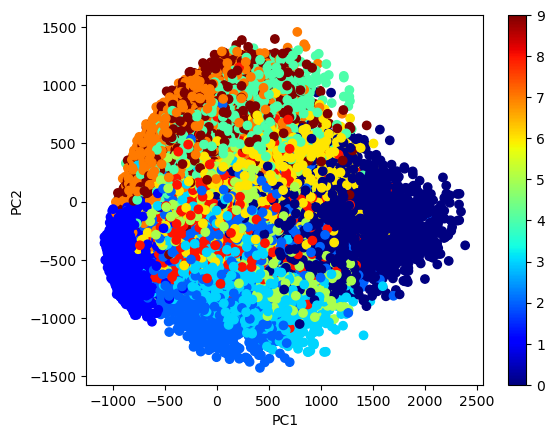

In [27]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='jet')
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


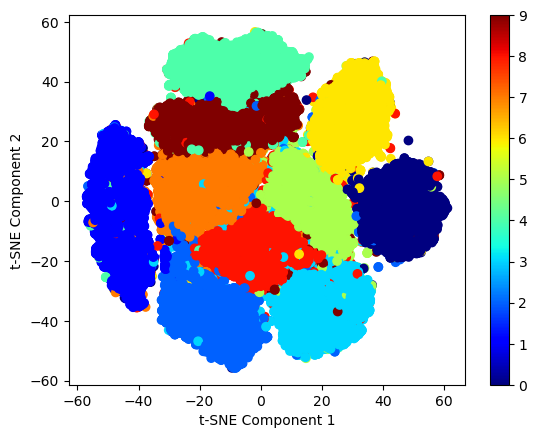

In [29]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='jet')
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()